In [5]:
import tensorflow
import shap
import lime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tf_keras_vis

C:\Users\viji0\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [66]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression

In [67]:
df = pd.read_csv("https://raw.githubusercontent.com/shrikant-temburwar/Loan-Prediction-Dataset/refs/heads/master/train.csv")
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [41]:
df=df.dropna()

In [42]:
le=LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col]=le.fit_transform(df[col])

In [43]:
X=df.drop("Loan_Status",axis=1)
y=df["Loan_Status"]

In [44]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [45]:
model=RandomForestClassifier(random_state=42)
model.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [46]:
y_pred=model.predict(X_test)
print("Classification Report:\n",classification_report(y_test,y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.50      0.62        28
           1       0.82      0.96      0.88        68

    accuracy                           0.82        96
   macro avg       0.82      0.73      0.75        96
weighted avg       0.82      0.82      0.81        96



In [47]:
df['pred']=model.predict(X)

In [48]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,pred
1,0,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0,1
2,1,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1,1
3,2,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1,1
4,3,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1,1
5,4,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1,1


<Axes: xlabel='Gender'>

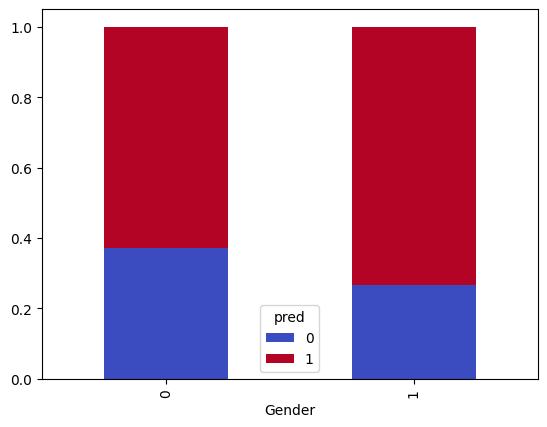

In [49]:
approval_by_gender = df.groupby('Gender')['pred'].value_counts(normalize=True).unstack()
approval_by_gender.plot(kind='bar', stacked=True, colormap='coolwarm')

In [70]:
df=pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/refs/heads/master/titanic.csv")

In [71]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


In [73]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [74]:
df['sex']=df['sex'].astype("category").cat.codes

In [75]:
df['embarked'].fillna(df['embarked'].mode()[0],inplace=True)

C:\Users\viji0\AppData\Local\Temp\ipykernel_7764\1024298632.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['embarked'].fillna(df['embarked'].mode()[0],inplace=True)


In [76]:
df['age'].fillna(df['age'].median(),inplace=True)

C:\Users\viji0\AppData\Local\Temp\ipykernel_7764\2790788646.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(df['age'].median(),inplace=True)


In [77]:
df['embarked']=df['embarked'].astype("category").cat.codes
df['embark_town']=df['embark_town'].astype("category").cat.codes

In [78]:
features = ['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
            'embark_town']
X = df[features]
y = df['survived']

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [80]:
model=LogisticRegression(max_iter=1000)
model.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [81]:
y_pred = model.predict(X_test)

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))

# STEP 5: Analyze Prediction Bias by Gender
# Add predicted values
df['Predicted'] = model.predict(X)



Classification Report:

              precision    recall  f1-score   support

           0       0.80      0.84      0.82       137
           1       0.72      0.67      0.70        86

    accuracy                           0.78       223
   macro avg       0.76      0.76      0.76       223
weighted avg       0.77      0.78      0.77       223



In [83]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         0
class            0
who              0
adult_male       0
deck           688
embark_town      0
alive            0
alone            0
Predicted        0
dtype: int64

<Axes: xlabel='sex'>

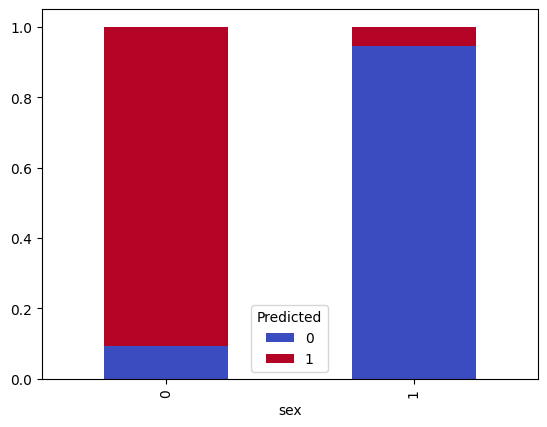

In [86]:
bias=df.groupby('sex')['Predicted'].value_counts(normalize=True).unstack()
bias.plot(kind="bar",stacked=True,colormap="coolwarm")

In [139]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [140]:
df = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/refs/heads/master/titanic.csv")

In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


In [142]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [143]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [144]:
df['sex']=df['sex'].astype("category").cat.codes
df['embarked'].fillna(df['embarked'].mode()[0],inplace=True)
df['age'].fillna(df['age'].median(),inplace=True)

C:\Users\viji0\AppData\Local\Temp\ipykernel_7764\1208658802.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['embarked'].fillna(df['embarked'].mode()[0],inplace=True)
C:\Users\viji0\AppData\Local\Temp\ipykernel_7764\1208658802.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy

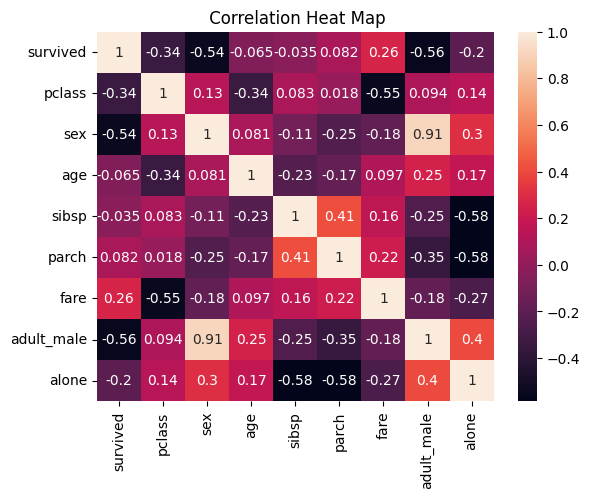

In [145]:
sns.heatmap(df.corr(numeric_only=True),annot=True)
plt.title(" Correlation Heat Map")
plt.show()

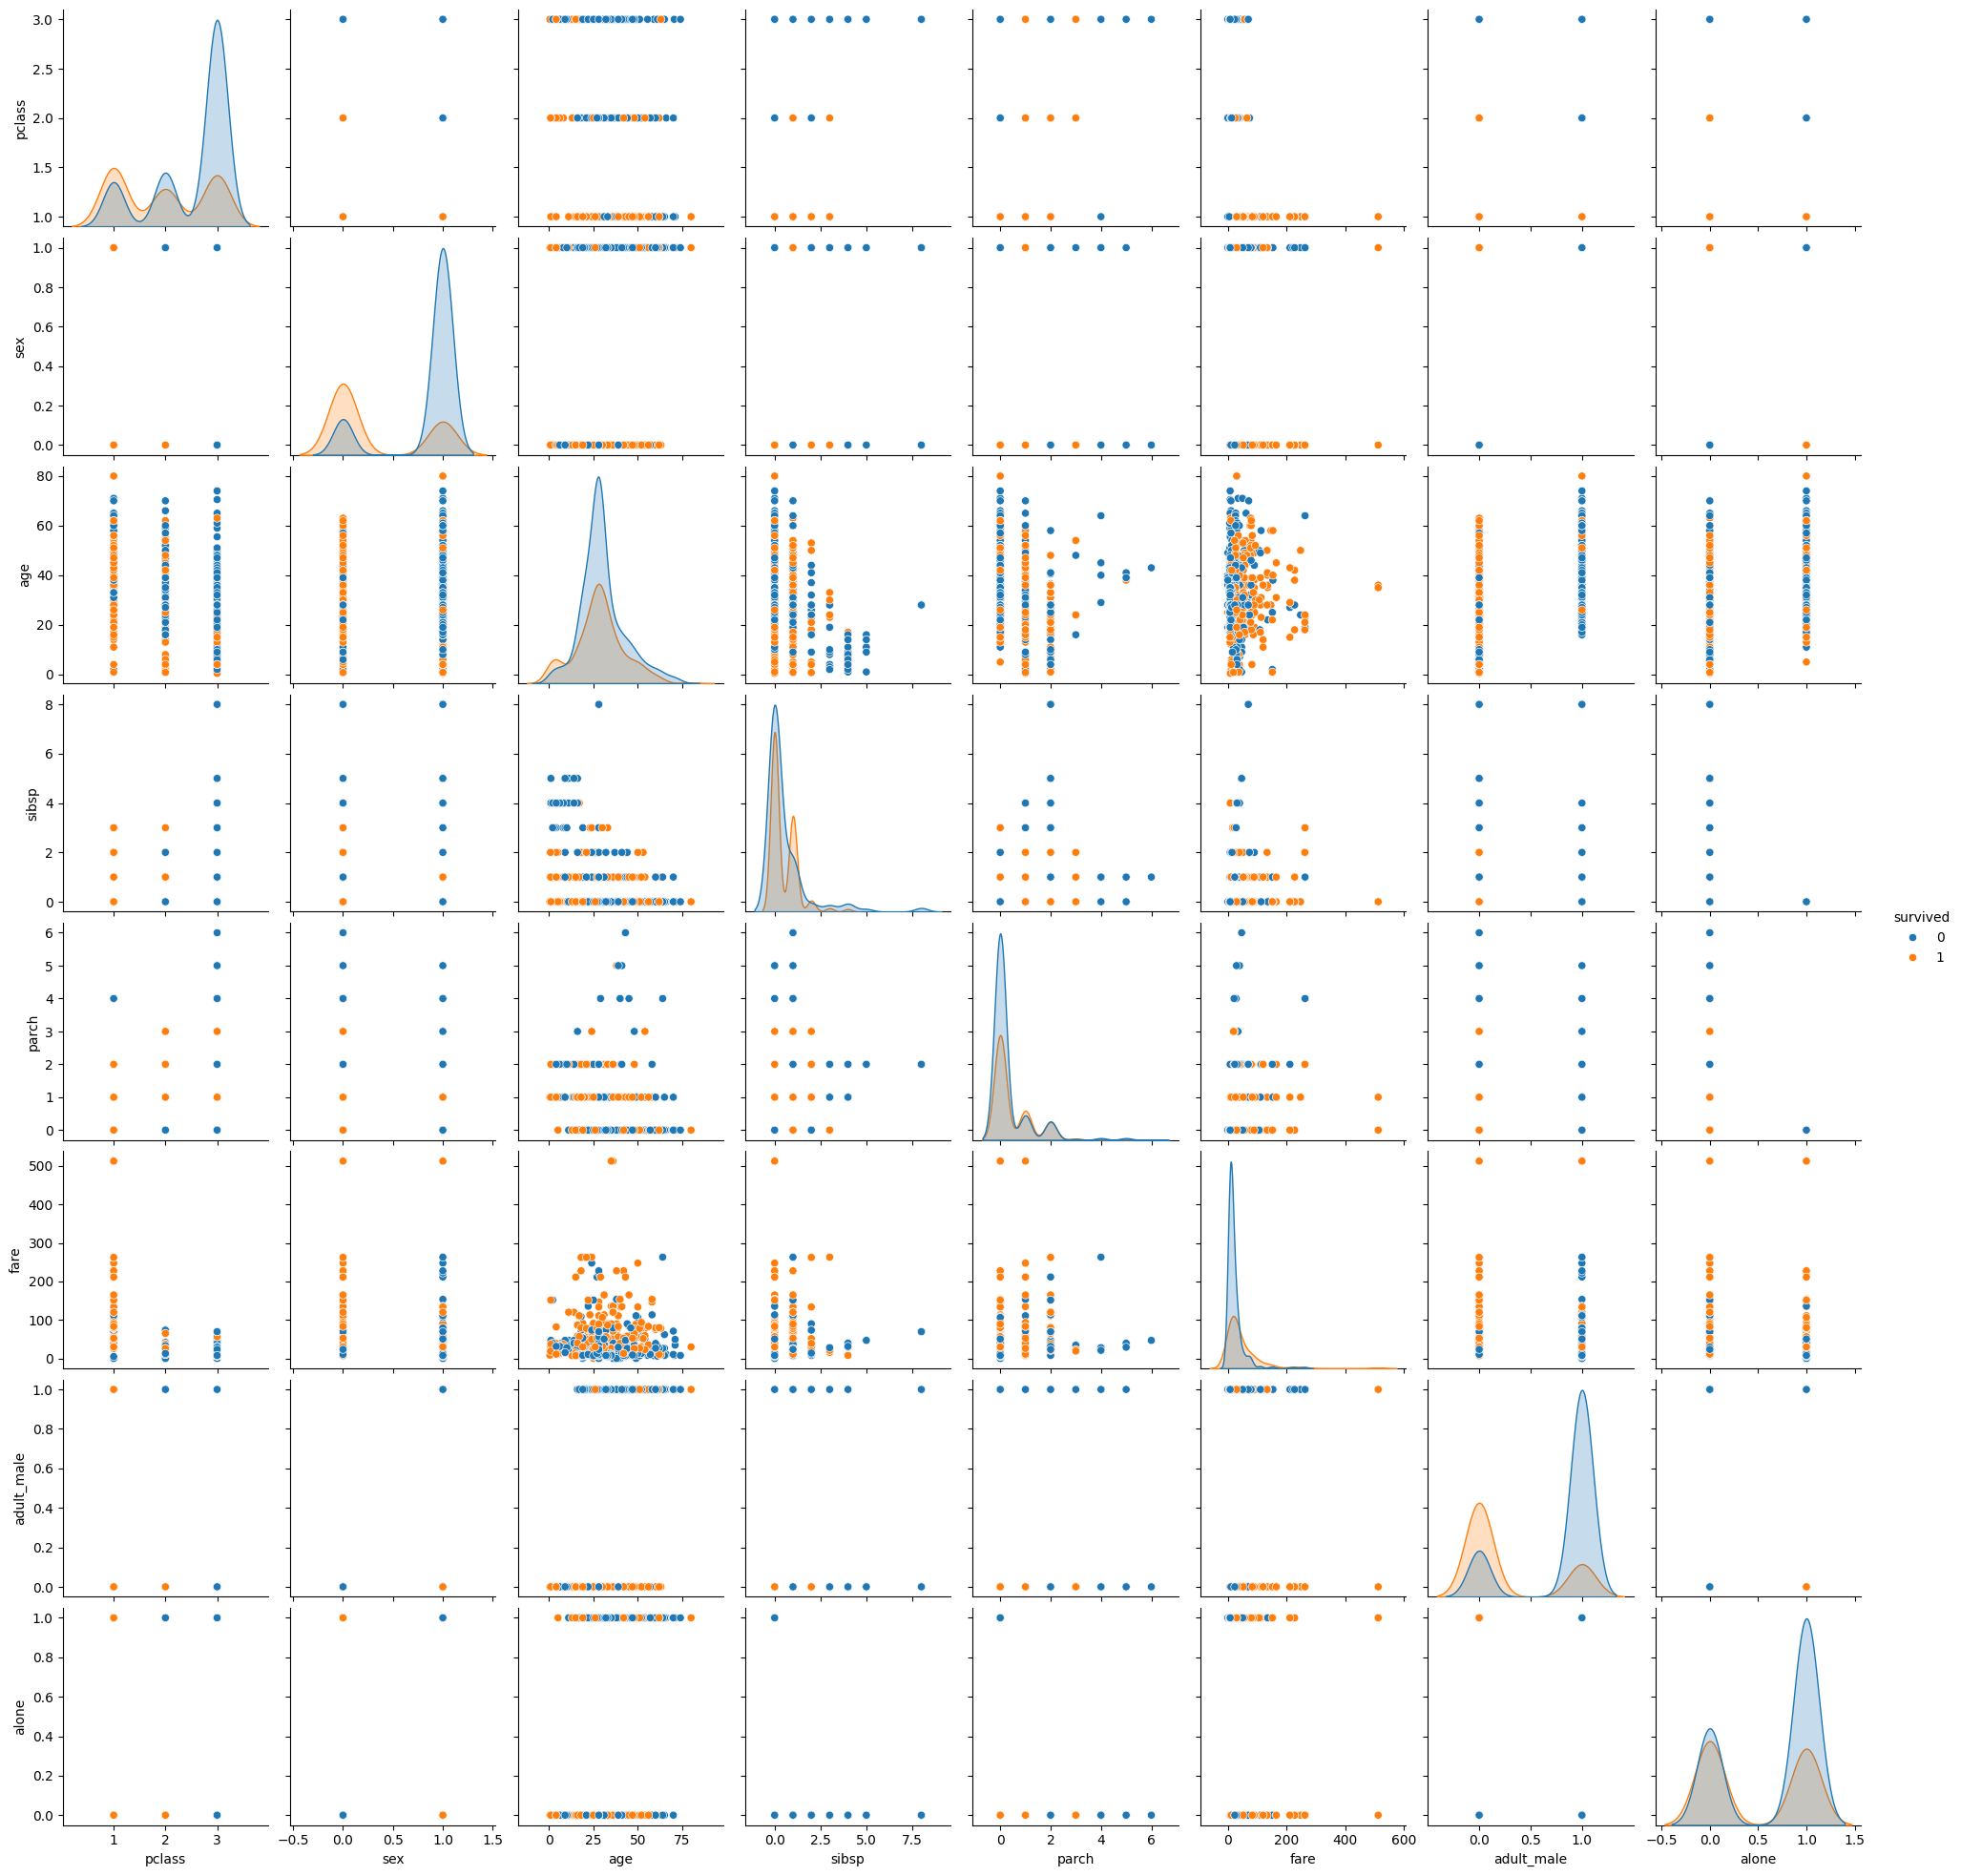

In [146]:
sns.pairplot(df,hue="survived")

<Axes: xlabel='survived', ylabel='count'>

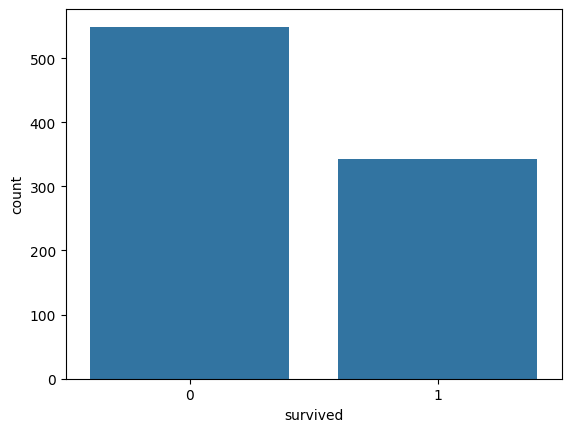

In [147]:
sns.countplot(x="survived",data=df)

In [87]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

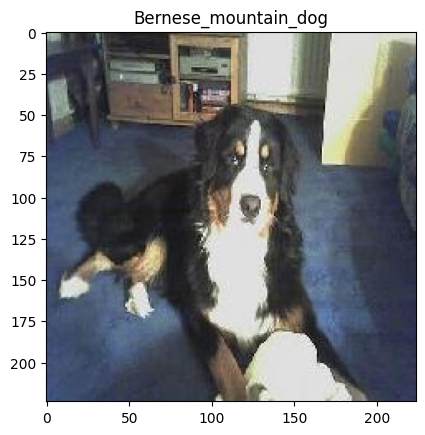

In [90]:
img=Image.open("dataset2/Bernese_mountain_dog/Bernese_mountain_dog_2.jpg")
plt.imshow(img)
plt.title("Bernese_mountain_dog")
plt.show()

In [91]:
img_arr=np.array(img)
print("Shape:",img_arr.shape)
print("Pixel Range:",img_arr.min(),"-",img_arr.max())

Shape: (224, 224, 3)
Pixel Range: 0 - 255


In [92]:
import glob
# Load image paths
image_paths = glob.glob("dataset2/*/*.jpg")
class_names = [path.split("\\")[-2] for path in image_paths]

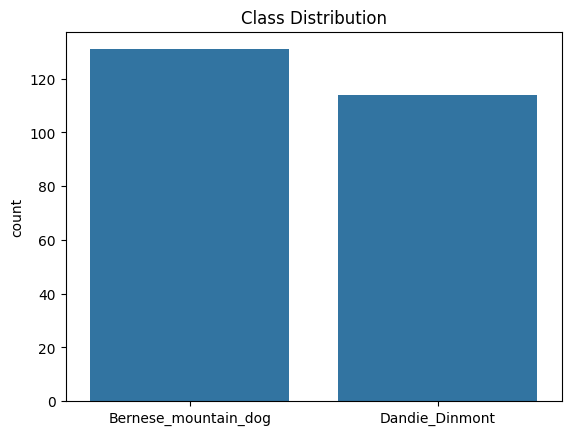

In [117]:

sns.countplot(x=class_names)
plt.title("Class Distribution")
plt.show()


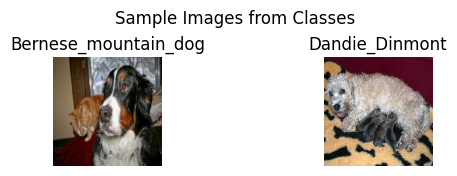

In [104]:
shown_classes = set()
plot_index = 1  # Counter for subplot position

for cls in class_names:
    for p in image_paths:
        if cls in p and cls not in shown_classes:
            img = Image.open(p)
            plt.subplot(3, 2, plot_index)
            plt.imshow(img)
            plt.title(cls)
            plt.axis('off')
            shown_classes.add(cls)
            plot_index += 1
            break
    if plot_index > 2:
        break

plt.suptitle("Sample Images from Classes")
plt.show()


In [105]:
sample_img = Image.open(image_paths[0])
img_array = np.array(sample_img)
print("Image shape (H, W, C):", img_array.shape)

Image shape (H, W, C): (224, 224, 3)


In [106]:
print("Pixel Min:", img_array.min())
print("Pixel Max:", img_array.max())
print("Pixel Mean:", img_array.mean())
print("Pixel Std Dev:", img_array.std())

Pixel Min: 0
Pixel Max: 255
Pixel Mean: 86.59465348639456
Pixel Std Dev: 62.49323822782475


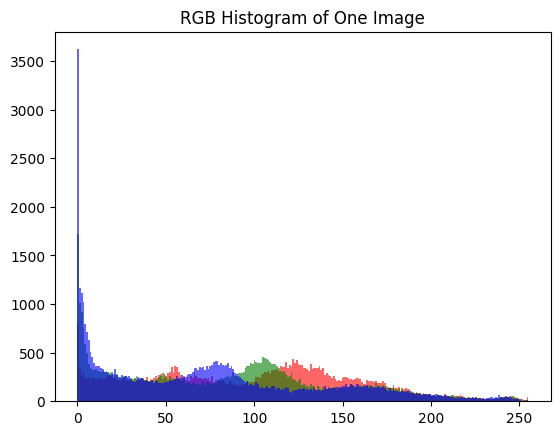

In [107]:
colors = ['r', 'g', 'b']
plt.figure()
for i, color in enumerate(colors):
    plt.hist(img_array[:, :, i].flatten(), bins=256, color=color, alpha=0.6)
plt.title("RGB Histogram of One Image")
plt.show()

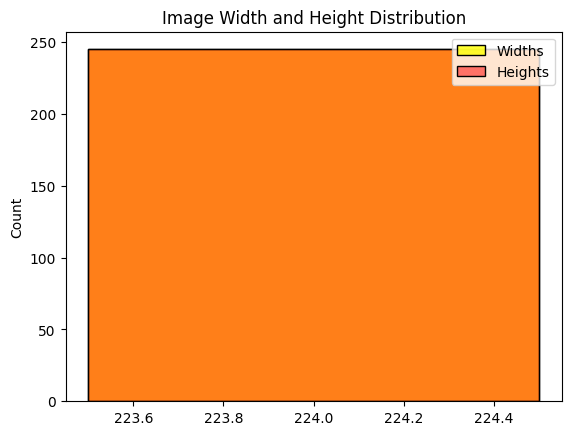

In [116]:
sizes = [Image.open(p).size for p in image_paths]
widths, heights = zip(*sizes)
plt.figure()
sns.histplot(widths, kde=True, color='yellow', label='Widths',alpha=0.8)
sns.histplot(heights, kde=True, color='red', label='Heights')
plt.legend()
plt.title("Image Width and Height Distribution")
plt.show()

In [114]:
from collections import Counter
count_per_class = Counter(class_names)
for cls, count in count_per_class.items():
    print(f"{cls}: {count} images")

Bernese_mountain_dog: 131 images
Dandie_Dinmont: 114 images


In [120]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [149]:
df = pd.read_csv("spam.csv",encoding="ISO-8859-1")

In [150]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [151]:
df=df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1)

In [152]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


<Axes: xlabel='v1', ylabel='count'>

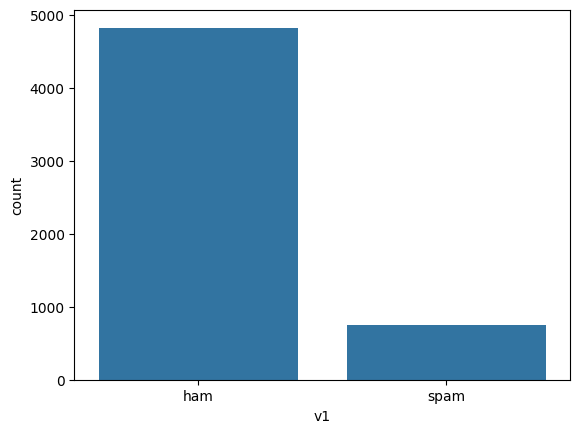

In [153]:
sns.countplot(x=df['v1'],data=df)

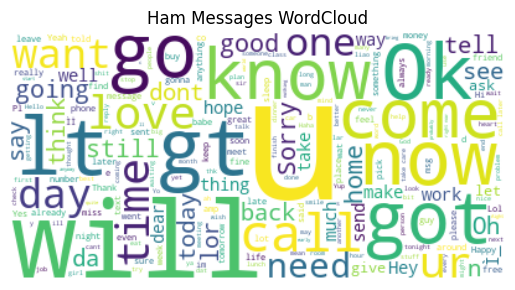

In [154]:
ham_text = ' '.join(df[df['v1'] == 'ham']['v2'])

ham_wordcloud = WordCloud(background_color='white').generate(ham_text)

# Display
plt.imshow(ham_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Ham Messages WordCloud")
plt.show()

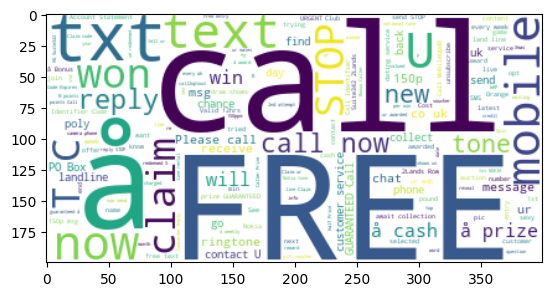

In [155]:
spam_test=''.join(df[df['v1']=='spam']['v2'])
spam_wc=WordCloud(background_color="white").generate(spam_test)
plt.imshow(spam_wc,interpolation="bilinear")

In [156]:
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
v1    0
v2    0
dtype: int64


In [157]:
print("\nClass Distribution:")
print(df['v1'].value_counts())


Class Distribution:
v1
ham     4825
spam     747
Name: count, dtype: int64


In [158]:
print("\nShape of the Dataset:", df.shape)


Shape of the Dataset: (5572, 2)


In [159]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [160]:
df=pd.read_csv("https://raw.githubusercontent.com/aniruddhachoudhury/Red-Wine-Quality/refs/heads/master/winequality-red.csv")

In [161]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [162]:
X=df.drop('quality',axis=1)
y=df['quality']

In [163]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


     

In [164]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()
model.fit(X_train,y_train)

RandomForestRegressor()

In [165]:
y_pred=model.predict(X_test)

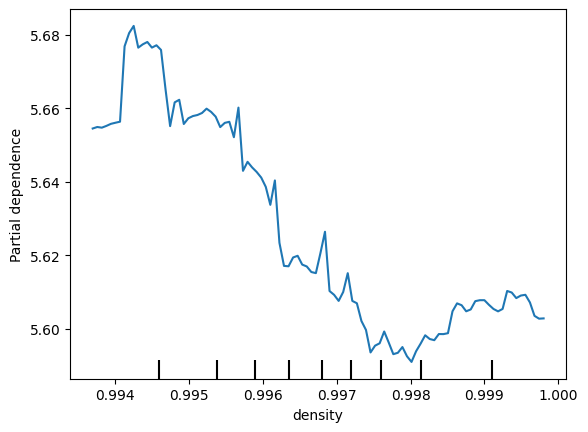

In [166]:
from sklearn.inspection import PartialDependenceDisplay
PartialDependenceDisplay.from_estimator(model,X_train,['density'])
plt.show()

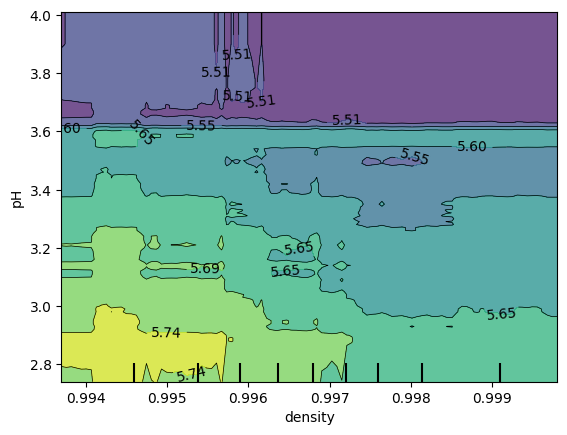

In [167]:
PartialDependenceDisplay.from_estimator(model, X_train, [("density","pH")])
plt.show()


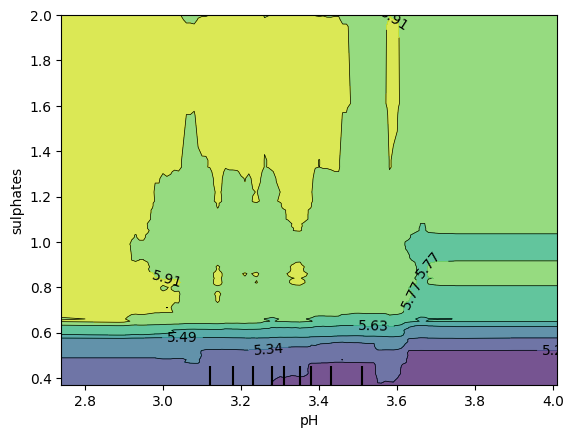

In [171]:
PartialDependenceDisplay.from_estimator(model, X_train, [("pH","sulphates")])
plt.show()


In [79]:
df=pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/refs/heads/master/diabetes.csv")

In [80]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [81]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
X=df.drop('Outcome', axis=1)
y=df['Outcome']

In [82]:
X_train, X_test, y_train, y_test=train_test_split(X,y,random_state=0)
model=RandomForestClassifier()
model.fit(X_train, y_train)


RandomForestClassifier()

In [83]:
feat_imp=model.feature_importances_

In [84]:
feature=X.columns

<BarContainer object of 8 artists>

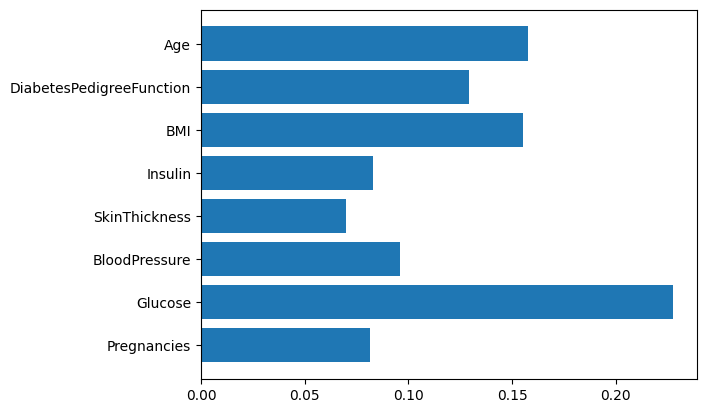

In [85]:
plt.barh(feature,feat_imp)

In [88]:
from sklearn.metrics import accuracy_score
baseline_pred=model.predict(X_test)
baseline_acc=accuracy_score(y_test,baseline_pred)
print("Baseline accuracy:",baseline_acc)

Baseline accuracy: 0.7864583333333334


In [89]:
sensitivity={}
for col in X.columns:
    X_test_perturbed=X_test.copy()
    X_test_perturbed[col]+=X_test_perturbed[col].std()
    perturbed_pred=model.predict(X_test_perturbed)
    perturbed_acc=accuracy_score(y_test,perturbed_pred)
    sensitivity[col]=baseline_acc-perturbed_acc

In [90]:
sensitivity_df=pd.DataFrame(list(sensitivity.items()),columns=['Feature','Accuracy Drop'])
sensitivity_df

,Feature,Accuracy Drop
0,Pregnancies,-0.020833
1,Glucose,0.015625
2,BloodPressure,0.000000
3,SkinThickness,0.000000
4,Insulin,0.015625
5,BMI,0.031250
6,DiabetesPedigreeFunction,0.000000
7,Age,0.020833


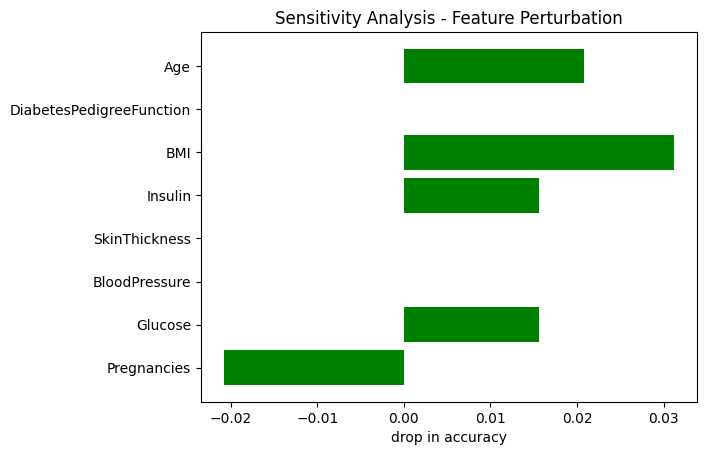

In [91]:
plt.barh(sensitivity_df['Feature'],sensitivity_df['Accuracy Drop'],color="green")
plt.xlabel("drop in accuracy")
plt.title("Sensitivity Analysis - Feature Perturbation")
plt.show()

In [173]:
import tensorflow as tf

In [174]:
dataset_path="data"
seed=42
batch_size=42
img_size=(224,224)

In [175]:
train_ds=tf.keras.preprocessing.image_dataset_from_directory(directory=dataset_path,subset="training",validation_split=0.3,seed=seed,shuffle=True,image_size=img_size,batch_size=batch_size)

Found 508 files belonging to 5 classes.
Using 356 files for training.


In [176]:
full_val_ds=tf.keras.preprocessing.image_dataset_from_directory(directory=dataset_path,subset="validation",validation_split=0.3,shuffle=True,image_size=img_size,seed=seed,batch_size=batch_size)

Found 508 files belonging to 5 classes.
Using 152 files for validation.


In [177]:
train_size=len(train_ds)
val_size=len(full_val_ds)//2
test_size=len(full_val_ds)-val_size

In [181]:
val_ds=full_val_ds.take(val_size)
test_ds=full_val_ds.take(test_size)

In [182]:
print(train_size)

9


In [183]:
print(val_size)

2


In [184]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense

In [185]:
model=Sequential([
    Conv2D(32,kernel_size=(2,2),input_shape=(224,224,3),activation="relu"),
    MaxPooling2D((2,2)),
    Conv2D(64,kernel_size=(2,2),activation="relu"),
    MaxPooling2D((2,2)),
    Conv2D(128,kernel_size=(2,2),activation="relu"),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(5,activation="softmax")
])
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])
model.summary()
    

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_31 (Conv2D)                   │ (None, 223, 223, 32)        │             416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_33 (MaxPooling2D)      │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_32 (Conv2D)                   │ (None, 110, 110, 64)        │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_34 (MaxPooling2D)      │ (None, 55, 55, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_33 (Conv2D)                   │ (None, 54, 54, 128)         │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_35 (MaxPooling2D)      │ (None, 27, 27, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_9 (Flatten)                  │ (None, 93312)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 5)                   │         466,565 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 508,133 (1.94 MB)

 Trainable params: 508,133 (1.94 MB)

 Non-trainable params: 0 (0.00 B)

In [186]:
model.fit(train_ds,validation_data=val_ds,epochs=10)

Epoch 1/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 12s 777ms/step - accuracy: 0.2773 - loss: 378.3609 - val_accuracy: 0.2381 - val_loss: 59.6801
Epoch 2/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 9s 684ms/step - accuracy: 0.3191 - loss: 43.0625 - val_accuracy: 0.2738 - val_loss: 9.8794
Epoch 3/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 10s 700ms/step - accuracy: 0.4235 - loss: 4.9641 - val_accuracy: 0.3929 - val_loss: 1.4824
Epoch 4/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 6s 696ms/step - accuracy: 0.7392 - loss: 0.7276 - val_accuracy: 0.4167 - val_loss: 1.3655
Epoch 5/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 6s 700ms/step - accuracy: 0.8848 - loss: 0.4163 - val_accuracy: 0.4881 - val_loss: 1.3952
Epoch 6/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 10s 695ms/step - accuracy: 0.9480 - loss: 0.1996 - val_accuracy: 0.5357 - val_loss: 1.6295
Epoch 7/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 7s 727ms/step - accuracy: 0.9930 - loss: 0.0638 - val_accuracy: 0.4524 - val_loss: 2.5125
Epoch 8/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 6s 698ms/step - accuracy: 0.9869 - loss: 0.0450 - val_accuracy: 0.4762 - va

In [187]:
for image, label in train_ds.take(1):
    single_image=image[0].numpy()

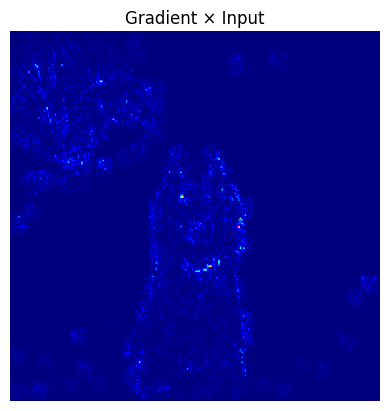

In [188]:
img_batch = np.expand_dims(single_image, axis=0)
img_tensor = tf.convert_to_tensor(img_batch)
with tf.GradientTape() as tape:
    tape.watch(img_tensor)
    preds = model(img_tensor)
    class_idx = tf.argmax(preds[0])
    loss = preds[0, class_idx]

grads = tape.gradient(loss, img_tensor)[0]
relevance = grads * single_image
relevance_gray = np.abs(np.mean(relevance, axis=-1))

plt.imshow(relevance_gray, cmap='jet')
plt.title("Gradient × Input")
plt.axis('off')
plt.show()


In [211]:
df=pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/refs/heads/master/diabetes.csv")
df.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [212]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [213]:
rf_model=RandomForestClassifier()
X=df.drop('Outcome', axis=1)
y=df['Outcome']

In [214]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
rf_model.fit(X_train, y_train)

y_pred=rf_model.predict(X_test)
print(accuracy_score(y_test,y_pred))


0.7337662337662337


In [215]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
dt_model=DecisionTreeClassifier()
dt_model.fit(X_test,y_pred)


DecisionTreeClassifier()

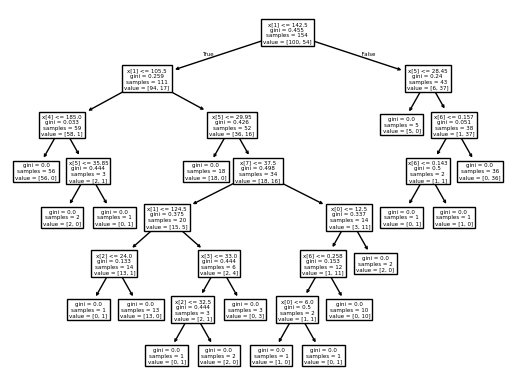

In [216]:
plot_tree(dt_model)
plt.show()

In [159]:
df=pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/refs/heads/master/diabetes.csv")

In [160]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [161]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [162]:
X=df.drop("Outcome",axis=1)
y=df['Outcome']

In [163]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [164]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier()
clf.fit(X_train,y_train)

RandomForestClassifier()

In [165]:
import lime.lime_tabular
explainer=lime.lime_tabular.LimeTabularExplainer(training_data=X_train.values,feature_names=X.columns.tolist(),class_names=[0,1],mode="classification",feature_selection="auto")


C:\Users\viji0\AppData\Local\Programs\Python\Python312\Lib\site-packages\lime\discretize.py:110: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
C:\Users\viji0\AppData\Local\Programs\Python\Python312\Lib\site-packages\lime\discretize.py:110: FutureWarning: Series.__setitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To set a value by position, use `ser.iloc[pos] = value`
  ret[feature] = int(self.lambdas[feature](ret[feature]))
C:\Users\viji0\AppData\Local\Programs\Python\Python312\Lib\site-packages\lime\lime_tabular.py:544: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always 

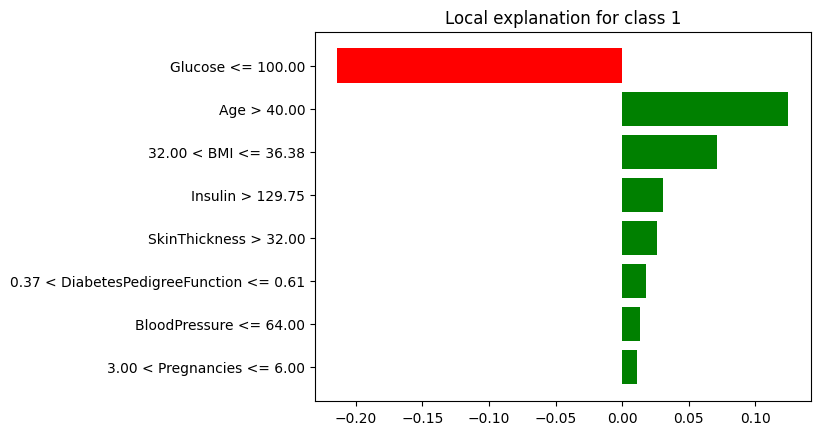

In [170]:
instance=X_test.iloc[0]
exp=explainer.explain_instance(instance,clf.predict_proba)
fig=exp.as_pyplot_figure()
plt.show()

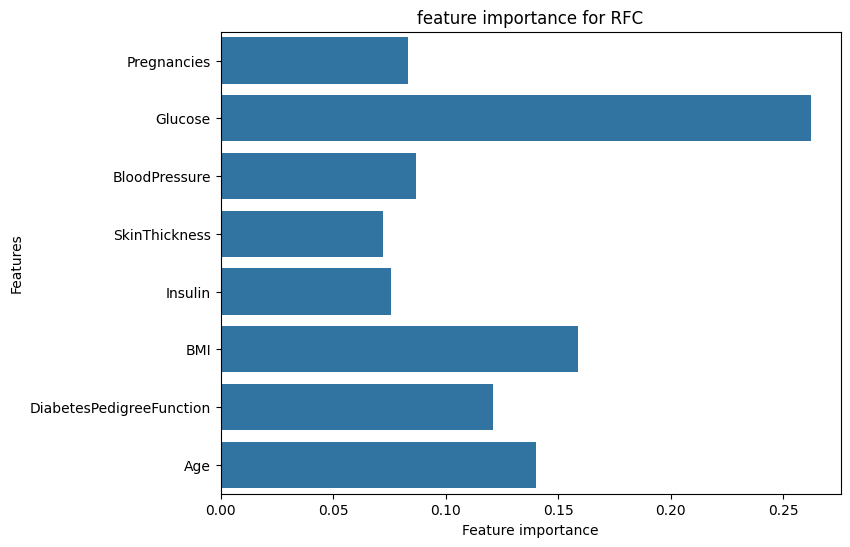

In [168]:
importances=clf.feature_importances_
feature_names=X.columns
import seaborn as sns
plt.figure(figsize=(8,6))
sns.barplot(x=importances, y=feature_names)
plt.xlabel("Feature importance")
plt.ylabel("Features")
plt.title("feature importance for RFC")
plt.show()


In [7]:
Dataset_path="data"
IMG_SIZE=(224,224)
BATCH_SIZE=32
SEED=42

In [8]:
train_ds=tf.keras.preprocessing.image_dataset_from_directory(directory=dataset_path,subset="training",validation_split=0.3,seed=seed,shuffle=True,image_size=img_size,batch_size=batch_size)

Found 508 files belonging to 5 classes.
Using 356 files for training.


In [9]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np


In [10]:
full_val_ds=tf.keras.preprocessing.image_dataset_from_directory(
    Dataset_path,
    validation_split=0.3,
    subset="validation",
    seed=SEED,
    shuffle=True,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE)

train_size=len(train_ds)
val_size=len(full_val_ds)//2
test_size=len(full_val_ds)-val_size

valid_ds=full_val_ds.take(val_size)
test_ds=full_val_ds.skip(val_size)

Found 508 files belonging to 5 classes.
Using 152 files for validation.


In [11]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [16]:
model=Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation="relu"),
    MaxPooling2D((2,2)),
    Conv2D(128,(3,3),activation="relu"),
    MaxPooling2D((2,2)),
    Conv2D(64,(3,3), activation="relu"),
    MaxPooling2D((2,2)),
    Conv2D(32, (3,3), activation="relu"),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation="relu"),
    Dense(5, activation="softmax")
])

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)                   │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 24, 24, 64)          │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 12, 12, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 10, 10, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 5, 5, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 800)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │         102,528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 288,677 (1.10 MB)

 Trainable params: 288,677 (1.10 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
history=model.fit(
    train_ds,
    validation_data=valid_ds,
    epochs=10)


Epoch 1/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step - accuracy: 0.2245 - loss: 18.0177 - val_accuracy: 0.2344 - val_loss: 2.3571
Epoch 2/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.2633 - loss: 1.8911 - val_accuracy: 0.3281 - val_loss: 1.5206
Epoch 3/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.2886 - loss: 1.4961 - val_accuracy: 0.3125 - val_loss: 1.3925
Epoch 4/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.3179 - loss: 1.3483 - val_accuracy: 0.4062 - val_loss: 1.3063
Epoch 5/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.3705 - loss: 1.3142 - val_accuracy: 0.3438 - val_loss: 1.3272
Epoch 6/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step - accuracy: 0.3910 - loss: 1.2964 - val_accuracy: 0.3438 - val_loss: 1.3044
Epoch 7/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 20s 1s/step - accuracy: 0.4370 - loss: 1.2133 - val_accuracy: 0.4062 - val_loss: 1.1612
Epoch 8/10
9/9 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.5312 - loss: 1.1380 - val_accuracy: 0.3750 - val_loss: 1.1857
Epoch 9

In [18]:
for image,label in train_ds.take(1):
    single_image=image[0].numpy()
    lab=label[0]
    break

In [19]:
from lime import lime_image
from skimage.segmentation import mark_boundaries
explainer=lime_image.LimeImageExplainer()
explaination=explainer.explain_instance(image=single_image,classifier_fn=model.predict,num_samples=10)

C:\Users\viji0\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
 80%|██████████████████████████████████████████████████████████████████▍                | 8/10 [00:00<00:00, 70.61it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 506ms/step


100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 12.13it/s]


Text(0.5, 1.0, 'LIME Explanation')

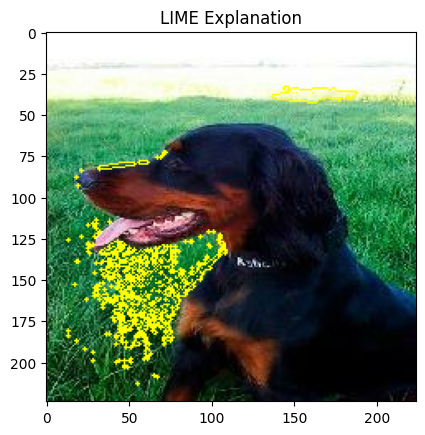

In [22]:
temp,mask=explaination.get_image_and_mask(label=explaination.top_labels[0])
plt.imshow(mark_boundaries(temp/255.0,mask))
plt.title("LIME Explanation")

In [66]:
import pandas as pd
import numpy as np
df=pd.read_csv("spam.csv",encoding="ISO-8859-1")

In [67]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [68]:
df=df.drop(["Unnamed: 2","Unnamed: 3","Unnamed: 4"],axis=1)

In [69]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [70]:
df=df.dropna(subset=['v1'])

In [71]:
from sklearn.model_selection import train_test_split
df['v1']=df['v1'].map({'ham':0, 'spam':1})
X_train,X_test,y_train,y_test=train_test_split(df['v2'],df['v1'], test_size=0.2)

In [72]:
df

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [73]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
vectorizer=TfidfVectorizer()
model=LogisticRegression()
pipe=make_pipeline(vectorizer,model)
pipe.fit(X_train,y_train)

Pipeline(steps=[('tfidfvectorizer', TfidfVectorizer()),
                ('logisticregression', LogisticRegression())])

In [78]:
import lime.lime_text

explainer=lime.lime_text.LimeTextExplainer(class_names=['ham','spam'])
exp=explainer.explain_instance(X_train.iloc[5],pipe.predict_proba)
exp.save_to_file('lime_explanation.html')


In [92]:
df=pd.read_csv("https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv")

In [93]:
df.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


In [94]:
feature_names=df.columns
feature_names

Index(['sepal.length', 'sepal.width', 'petal.length', 'petal.width',
       'variety'],
      dtype='object')

In [95]:
from sklearn.model_selection import train_test_split
X=df.drop('variety',axis=1)
y=df['variety']
X_train, X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [96]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier()

Using 120 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.
100%|██████████████████████████████████████████████████████████████████████████████████| 30/30 [00:01<00:00, 21.21it/s]


<Figure size 640x480 with 0 Axes>

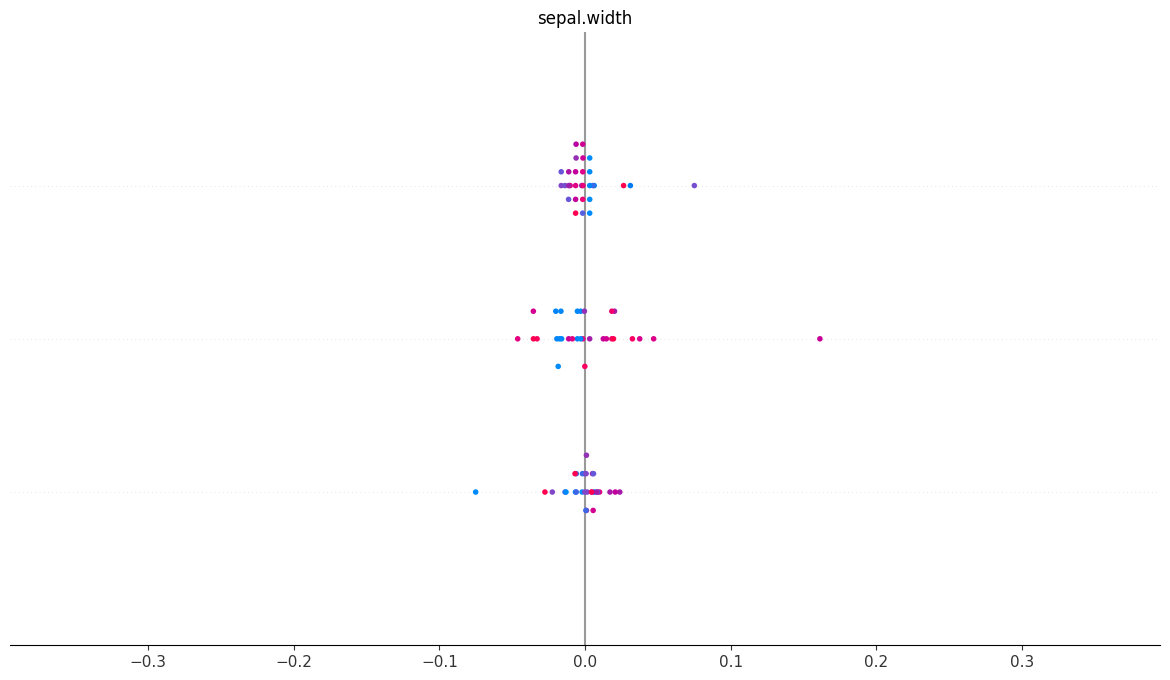

In [97]:
import shap
explainer=shap.KernelExplainer(model.predict_proba,X_train)
shap_values=explainer.shap_values(X_test)
shap.summary_plot(shap_values,X_test,feature_names=feature_names)

In [98]:
df=pd.read_csv("https://raw.githubusercontent.com/aniruddhachoudhury/Red-Wine-Quality/refs/heads/master/winequality-red.csv")

In [99]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [100]:
x=df.drop("quality",axis=1)
y=df['quality']


In [101]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=42)

In [102]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [103]:
import shap
explainer=shap.LinearExplainer(model,X_train,feature_perturbation="correlation_dependent")
shap_values=explainer.shap_values(X_test)


C:\Users\viji0\AppData\Local\Programs\Python\Python312\Lib\site-packages\shap\explainers\_linear.py:99: FutureWarning: The feature_perturbation option is now deprecated in favor of using the appropriate masker (maskers.Independent, maskers.Partition or maskers.Impute).
  warnings.warn(wmsg, FutureWarning)
Estimating transforms: 100%|█████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 1274.19it/s]


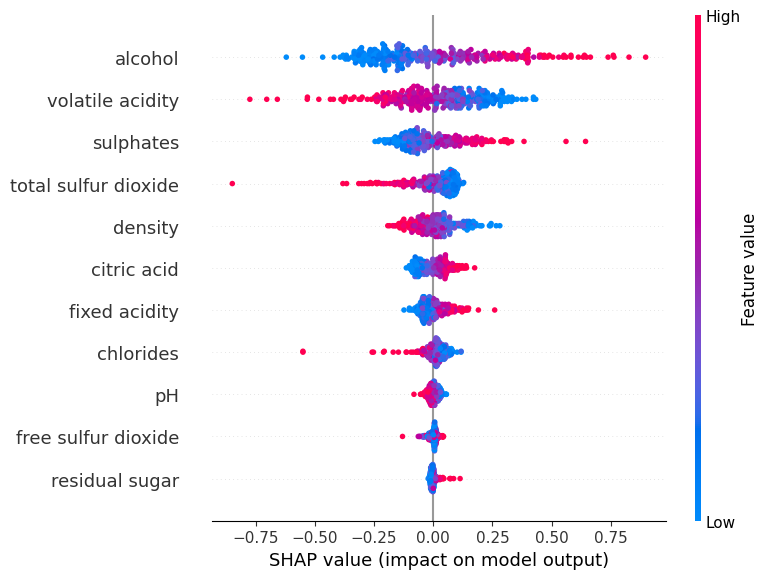

In [106]:
shap.summary_plot(shap_values,X_test,feature_names=x.columns)


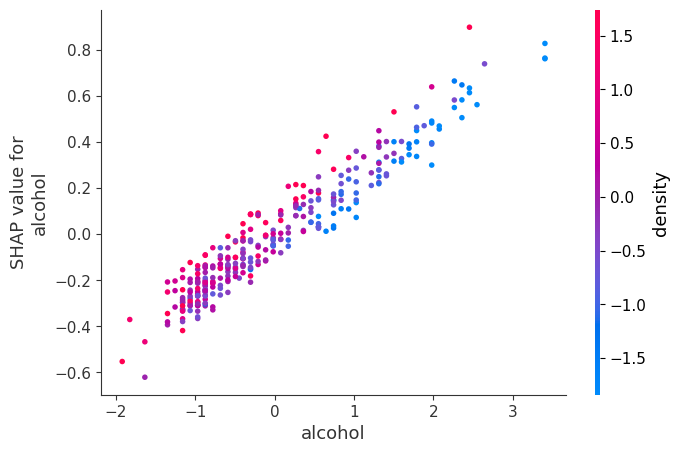

In [107]:
shap.dependence_plot('alcohol',shap_values,X_test,feature_names=x.columns)

In [108]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0], feature_names=x.columns)


In [110]:
dataset_path="data"
IMG_SIZE=(224,224)
BATCH_SIZE=32
SEED=42

In [111]:
train_ds=tf.keras.preprocessing.image_dataset_from_directory(
    dataset_path,
    validation_split=0.3,
    subset="training",
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    seed=SEED,
    shuffle=True)

full_valid_ds=tf.keras.preprocessing.image_dataset_from_directory(
    dataset_path,
    validation_split=0.3,
    subset="validation",
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    seed=SEED,
    shuffle=True)

train_size=len(train_ds)
val_size=len(full_valid_ds)//2
test_size=len(full_valid_ds)-val_size

valid_ds=full_valid_ds.take(val_size)
test_ds=full_valid_ds.skip(val_size)


Found 508 files belonging to 5 classes.
Using 356 files for training.
Found 508 files belonging to 5 classes.
Using 152 files for validation.


In [113]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


In [116]:
model = Sequential([
    # First Convolutional Block
    Conv2D(32, (3, 3), activation="relu", input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),

    # Second Convolutional Block (Increase filters)
    Conv2D(64, (3, 3), activation="relu"),
    MaxPooling2D((2, 2)),

    # Third Convolutional Block (Increase filters further)
    Conv2D(128, (3, 3), activation="relu"),
    MaxPooling2D((2, 2)),

    # Fourth Convolutional Block (More filters)
    Conv2D(256, (3, 3), activation="relu"),
    MaxPooling2D((2, 2)),

    # Flatten and Dense layers
    Flatten(),
    Dense(512, activation="relu"),  # Increased neurons for better learning capacity
    Dense(128, activation="relu"),
    Dense(5, activation="softmax")  # Final output for binary classification
])

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy",metrics=["accuracy"])
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_19 (Conv2D)                   │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_19 (MaxPooling2D)      │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_20 (Conv2D)                   │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_20 (MaxPooling2D)      │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_21 (Conv2D)                   │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_21 (MaxPooling2D)      │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_22 (Conv2D)                   │ (None, 24, 24, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_22 (MaxPooling2D)      │ (None, 12, 12, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 36864)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 512)                 │      18,874,880 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,329,605 (73.74 MB)

 Trainable params: 19,329,605 (73.74 MB)

 Non-trainable params: 0 (0.00 B)

In [117]:
model.fit(
    train_ds,
    validation_data=valid_ds,
    epochs=7)


Epoch 1/7
12/12 ━━━━━━━━━━━━━━━━━━━━ 9s 509ms/step - accuracy: 0.2668 - loss: 68.8583 - val_accuracy: 0.2969 - val_loss: 1.4566
Epoch 2/7
12/12 ━━━━━━━━━━━━━━━━━━━━ 6s 505ms/step - accuracy: 0.2984 - loss: 1.4639 - val_accuracy: 0.3594 - val_loss: 1.3787
Epoch 3/7
12/12 ━━━━━━━━━━━━━━━━━━━━ 7s 557ms/step - accuracy: 0.4323 - loss: 1.3505 - val_accuracy: 0.3906 - val_loss: 1.2684
Epoch 4/7
12/12 ━━━━━━━━━━━━━━━━━━━━ 8s 635ms/step - accuracy: 0.5150 - loss: 1.0968 - val_accuracy: 0.4375 - val_loss: 1.1809
Epoch 5/7
12/12 ━━━━━━━━━━━━━━━━━━━━ 8s 654ms/step - accuracy: 0.6251 - loss: 0.9033 - val_accuracy: 0.5312 - val_loss: 1.0081
Epoch 6/7
12/12 ━━━━━━━━━━━━━━━━━━━━ 8s 670ms/step - accuracy: 0.7377 - loss: 0.7110 - val_accuracy: 0.4062 - val_loss: 1.5590
Epoch 7/7
12/12 ━━━━━━━━━━━━━━━━━━━━ 8s 658ms/step - accuracy: 0.8543 - loss: 0.4207 - val_accuracy: 0.5938 - val_loss: 1.3130


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.0913936421275139e-11..1.000444171950221e-11].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.4665602066088468e-11..1.4097167877480388e-11].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.0691004465334117e-11..2.4101609596982598e-11].


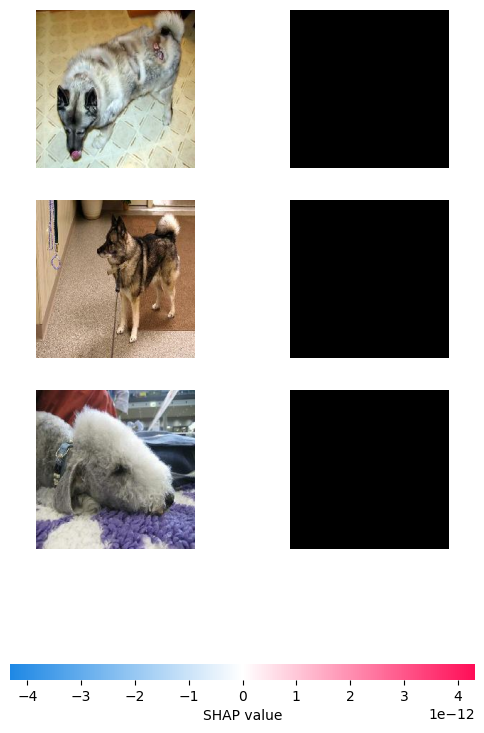

In [126]:
import numpy as np
import shap
for images,labels in train_ds.take(1):
    background=images[:10]
    test_images=images[10:13]
    break
background_np=background.numpy().astype(np.float32)/255.0
test_images_np=test_images.numpy().astype(np.float32)/255.0
explainer=shap.GradientExplainer(model,background_np)
shap_values=explainer.shap_values(test_images_np)
shap.image_plot(shap_values,test_images_np)

In [127]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input
from sklearn.linear_model import SGDClassifier
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [130]:
def build_model():
    inputs=Input(shape=(224,224,3))
    x=Conv2D(16,(3,3),activation="relu")(inputs)
    x=MaxPooling2D()(x)
    x=Conv2D(32,(3,3),activation="relu",name="target_layer")(x)
    x=MaxPooling2D()(x)
    x=Flatten()(x)
    outputs=Dense(5,activation="softmax")(x)
    return Model(inputs,outputs)

In [131]:
model=build_model()

In [132]:
intermediate_model=Model([model.input],[model.get_layer('target_layer').output])

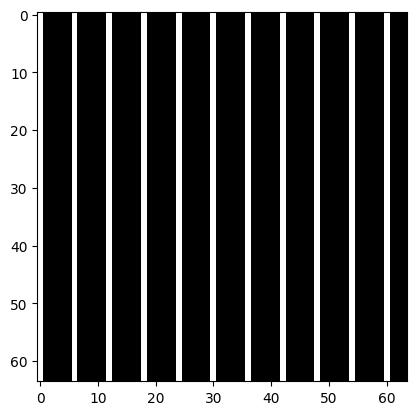

In [149]:
stripes = np.zeros((20,64,64,3))
stripes[:,:,::6,:] = 1
plt.imshow(stripes[0])
plt.show()

In [152]:
random = np.random.rand(20,64,64,3)
sample = img_to_array(load_img('zebra.jpeg',target_size=(64,64)))/255.0

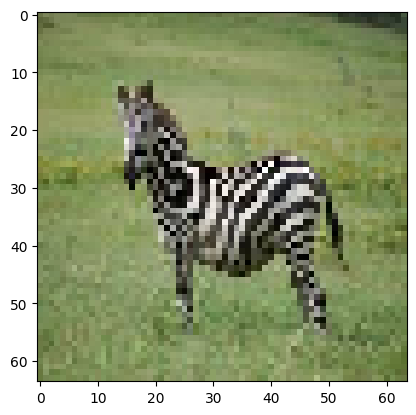

In [153]:
#visualize sample
plt.imshow(sample)
plt.show()

In [154]:
pos,neg = intermediate_model.predict(stripes),intermediate_model.predict(random)
X = np.vstack([pos.reshape(20,-1), neg.reshape(20,-1)])
y = [1]*20 + [0]*20
cav = SGDClassifier().fit(X,y).coef_
dd = np.dot(intermediate_model.predict(sample[np.newaxis]).reshape(-1), cav.T)[0]
tcav = (np.dot(pos.reshape(20,-1),cav.T) > 0).mean()


print(f"Directional Derivative: {dd:.4f}\nTCAV Score: {tcav:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
Directional Derivative: -317.8128
TCAV Score: 1.00


C:\Users\viji0\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\models\functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor_75']
Received: inputs=Tensor(shape=(None, None, None, 3))
  warnings.warn(msg)


In [155]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

In [156]:
texts=[
    " he is a good boy " ,
    " cricket is perfect " ,
    " the movie is fantastic" , 
    " seen a bad boy",
    " the movie is worst",
    " the movie is ugly",
]
labels = [1 , 1 , 1 , 0 , 0 , 0]
positive_concepts = ["fantastic" , " perfect" , " good" ]
negative_concepts = ["bad" , "worst" , "ugly"]

test_texts =[
    " cricket is fantastic ",
    " movie is ugly " ,
    " seen a good boy" , 
]

In [157]:
vectorizer=TfidfVectorizer()
X_train=vectorizer.fit_transform(texts)
model=LogisticRegression()
model.fit(X_train,labels)

LogisticRegression()

In [158]:
def get_concept_vectors(concepts):
    vectors=vectorizer.transform(concepts).toarray()
    return np.mean(vectors,axis=0)

def get_tcav_scores(texts, concept_vec):
    vectors=vectorizer.transform(texts).toarray()
    scores=vectors@concept_vec
    predictions=model.predict(vectors)
    class1_score=np.mean(scores[predictions==1])
    class0_score=np.mean(scores[predictions==0])
    return class1_score-class0_score

pcv=get_concept_vectors(positive_concepts)
ncv=get_concept_vectors(negative_concepts)

print("positive concept vectors:",get_tcav_scores(test_texts, pcv))
print("negative concept vectors:",get_tcav_scores(test_texts, ncv))


positive concept vectors: 0.21275635636435192
negative concept vectors: -0.2525705431516785
